# 6.2 pandas로 그래프 그리기  

### pandas 그래프 종류  
    * pd.plot.그래프함수(x,y,...)
    * pd.plot(x,y,kind="그래프 종류",...)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"]="Malgun Gothic"
graph=pd.read_excel(r"D:\works\source\chapter06\그래프 실습2.xlsx",sheet_name="Sheet1")
graph.head(10)

,반,성명,국어,영어,수학,사회,과학
0,1반,홍길동,82,80,94,23,64
1,2반,백일홍,76,63,76,84,56
2,3반,이삼상,75,74,86,90,61
3,1반,정말로,83,55,64,90,65
4,2반,한번도,82,95,66,75,60
5,3반,이철수,53,65,59,88,69
6,1반,김영자,66,71,32,84,57
7,2반,다니엘,81,54,95,71,48
8,3반,이미로,59,69,75,90,52
9,1반,신성삼,64,66,59,91,49


### 선그래프  
    * pd.plot(y, grid, title, color,...)  

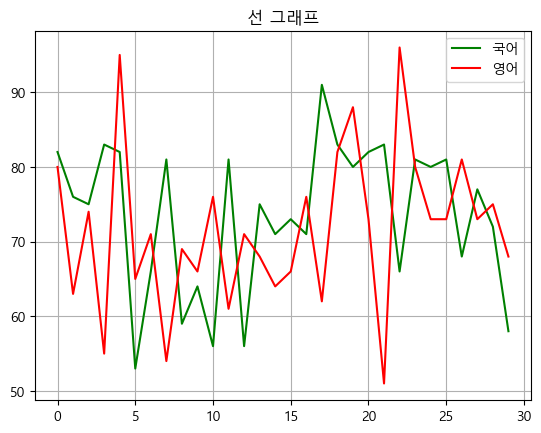

In [2]:
graph.plot(y=["국어","영어"],grid=True, title="선 그래프", color=["green","red"])
plt.show()

### 산점도  
    * 여러 데이터 열의 분포를 비교할 떄 유용함

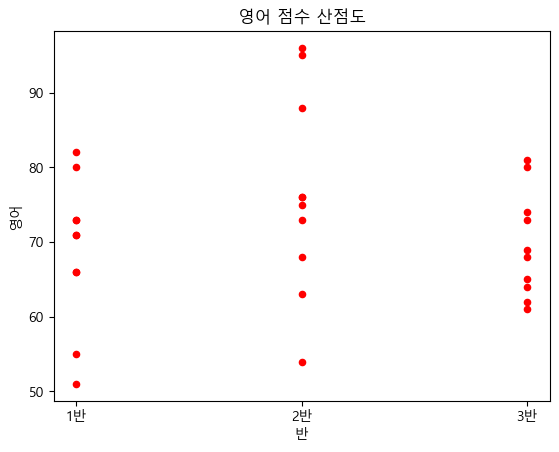

In [3]:
graph.plot.scatter(x="반",y="영어",color="red",title="영어 점수 산점도")
plt.show()

### 막대그래프   
    * 요약된 정보를 포함하여, 하나의 과목별 수치형 데이터를 막대 그래프로 표현  
    
    pd.plot.bar(grid, title, color,...)  -- 수직막대형
    pd.plot.barh(grid, title, color, ...)  -- 수평막대형 

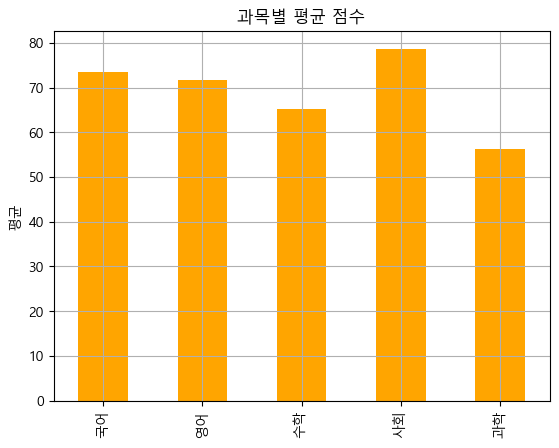

In [4]:
graph.iloc[:,2:7].mean().plot.bar(grid=True,title="과목별 평균 점수",color="orange",ylabel="평균")
plt.show()

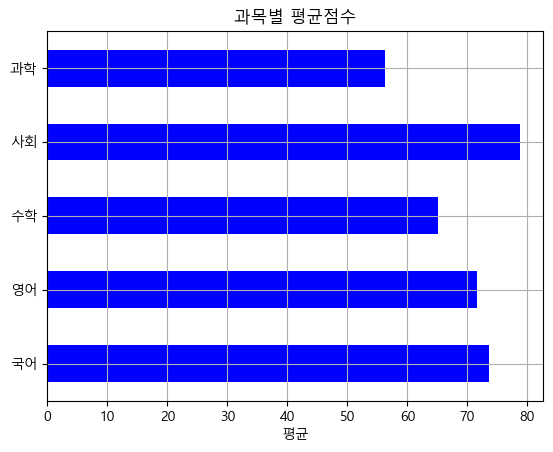

In [5]:
a=graph.iloc[:,2:7].mean().plot.barh(grid=True,color="blue")
a.set_xlabel("평균")
a.set_title("과목별 평균점수")
plt.show()

### 원 그래프   
    * 요약된 자료를 필요로 하며, 인덱스에 저장된 값을 항목명으로 사용할 수 있으며, 속성은 plt.pie()와 유사함
    
    * pd.plot.pie(data,index)

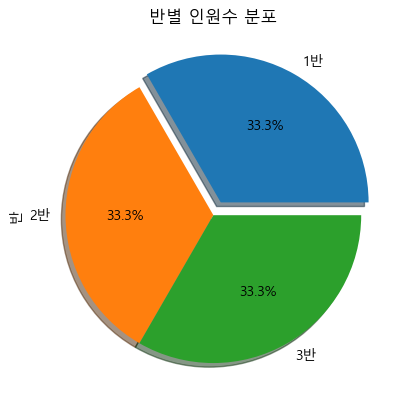

In [6]:
class_c=graph.groupby("반").size()
class_c.plot.pie(title="반별 인원수 분포",ylabel="반",autopct="%1.1f%%", explode=(0.1,0,0),shadow=True)
plt.show()

In [8]:
fruit=["사과","포도","딸기","참외"]
sales=[12,31,24,46]
df=pd.Series(sales, index=fruit)

df.plot.pie(title="과일 판매량", ylabel="과일", autopct="%1.1f%%", explode(0.1,0,0,0), shadow=True)
plt.show()

SyntaxError: positional argument follows keyword argument (3305668432.py, line 5)

In [10]:
fruit=["사과","포도","딸기","참외"]
sales=[12,31,24,46]
df=pd.Series(sales, index=fruit)
df.plot.pie(title="과일 판매량",ylabel="과일",autopct=""%1.1f%%,explode=(0.1,0,0,0), shadow=True)
plt.show()

SyntaxError: invalid decimal literal (2469384824.py, line 4)

### 히스토그램  
    * 도수분포표의 각 계급을 가로축, 각 계급별 빈도 수를 세로축 표현  
    
    pd["열 이름"].plot.hist(bins, color, edgecolor, title,...)

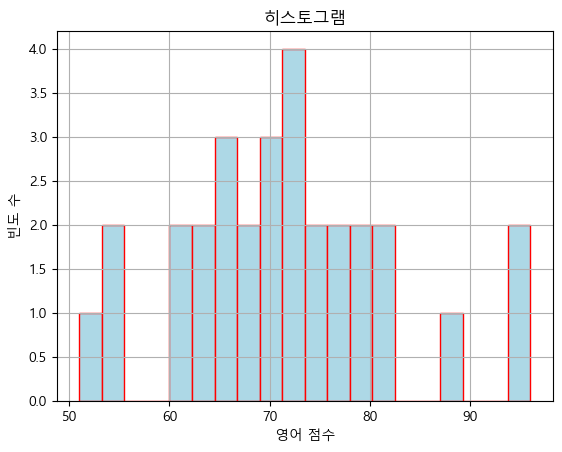

In [11]:
a=graph["영어"].plot.hist(bins=20,color="lightblue",edgecolor="red",grid=True, title="히스토그램")
a.set_xlabel("영어 점수"), a.set_ylabel("빈도 수")
plt.show()

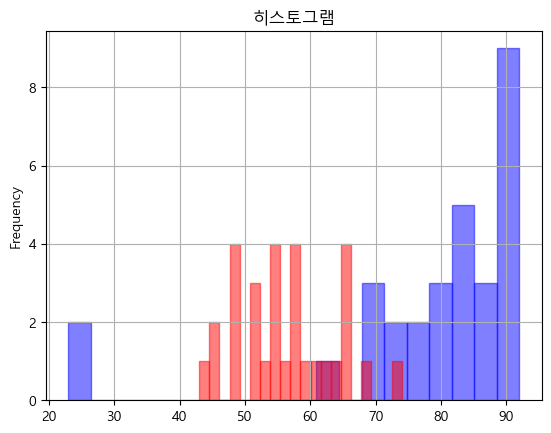

In [12]:
graph["사회"].plot.hist(bins=20, color="blue", edgecolor="blue", alpha=0.5, title="히스토그램")
graph["과학"].plot.hist(bins=20, color="red", edgecolor="red",alpha=0.5, grid=True)
plt.show()

### 상자 수염 그래프  
    * 데이터 프레임의 수치형 열 값을 범주형 열 값으로 구분  -> 범주형 데이터 분포 비교하여 이상치 파악   
    
    pd.boxplot(column=[], by)  --> column=수치형 열 데이터, by=범주형 열 데이터   
    

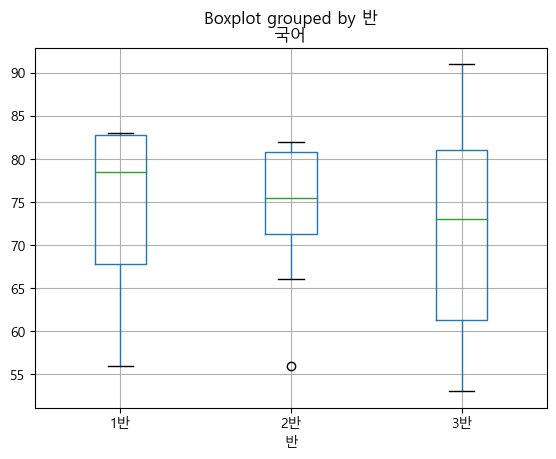

In [13]:
graph.boxplot(column=["국어"], by="반")
plt.show()